In [1]:
# Delare the required imports
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Read the Crypto Data as Data Frame
crypto_df = pd.read_csv(Path("crypto_data.csv"), index_col=0)
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
# Remove the inactive cryptos
active_crypto_df = crypto_df[crypto_df['IsTrading'] == True]
active_crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [4]:
#Drop the column "IsTrading"
active_crypto_df1 = active_crypto_df.drop('IsTrading', axis=1)

active_crypto_df1

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [5]:
#Remove all the rows that have at least one null value.
active_crypto_notnull_df = active_crypto_df1.dropna()
active_crypto_notnull_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [6]:
# Filter for cryptocurrencies that have been mined. 
# That is, the total coins mined should be greater than zero.

actively_mined_crypto_df = active_crypto_notnull_df[active_crypto_notnull_df['TotalCoinsMined'] > 0]
actively_mined_crypto_df


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
#delete the CoinName from the dataframe.

coin_name_df = actively_mined_crypto_df['CoinName']
actively_mined_crypto_df1 = actively_mined_crypto_df.drop('CoinName', axis=1)

actively_mined_crypto_df1
coin_name_df

42          42 Coin
404         404Coin
1337      EliteCoin
BTC         Bitcoin
ETH        Ethereum
           ...     
ZEPH         ZEPHYR
GAP         Gapcoin
BDX          Beldex
ZEN         Horizen
XBC     BitcoinPlus
Name: CoinName, Length: 532, dtype: object

In [8]:
# create dummy variables Algorithm and ProofType

X = pd.get_dummies(actively_mined_crypto_df1 , columns=['Algorithm', 'ProofType'])
#X = pd.get_dummies(actively_mined_crypto_df1 , columns=['Algorithm'])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_scaled = StandardScaler().fit_transform(X)
X_scaled


array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [10]:
# Dimensionality Reduction with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90)

X_pca = pca.fit_transform(X_scaled)

X_pca


array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
        -2.51777115e-15,  2.34714244e-15, -1.28491779e-15],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
        -2.36047734e-15,  2.46067531e-15, -1.37344197e-16],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
         2.05341706e-13,  1.56353552e-14,  2.18540646e-14],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
         1.31887801e-14,  1.94821222e-14, -3.53804855e-14],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
         1.17286846e-15, -1.00654158e-15,  8.66294367e-16],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
         4.01692460e-15,  2.11460174e-15, -1.49888028e-15]])

In [11]:
X_pca.shape

(532, 74)

In [12]:
#further reduce the dataset dimensions with t-SNE and visually inspect the results

from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=35)

tsne_features = tsne.fit_transform(X_pca)

tsne_features.shape
tsne_features

/Users/hinaabidi/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


array([[  6.537552 , -17.675163 ],
       [ 11.340787 , -11.826901 ],
       [  8.215686 , -26.379482 ],
       ...,
       [-16.65885  ,  16.0089   ],
       [ -1.5366162,  20.248539 ],
       [ -8.0687275,  -6.6380835]], dtype=float32)

In [13]:
labels = coin_name_df.value_counts()

labels

DubaiCoin         2
42 Coin           1
Pioneer Coin      1
Monkey Project    1
Litecoin Plus     1
                 ..
Let it Ride       1
Omni              1
BitSend           1
VIP Tokens        1
BitcoinPlus       1
Name: CoinName, Length: 531, dtype: int64

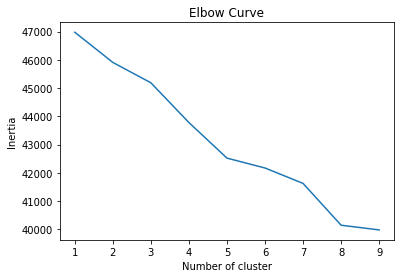

In [14]:
from sklearn.cluster import KMeans

inertia = []

K = list(range(1, 10))


for i in K:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_pca)
    inertia.append(km.inertia_)
    

elbow_data = {"k": K, "inertia": inertia}

df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(1, 10)))
plt.title('Elbow Curve')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()



In [ ]:
#Recommendation
####################################
# Based on my findings, We can cluster the Cryptocurrencies.
# I can see that there are 8 clusters of Cryptocurrencies in which the investment can 
# be made.

# These clusters are based on the Encryption algorithm and the Proof type.
####################################